[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nishani53/Khanal_MSc_Thesis_MSU/blob/main/Khanal_MSU_project_Competition_hotspot_example/Khanal_MSU_project_competition_hotspot_example_2023.ipynb)


# Maps for Primary Milling Services in Michigan


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu

# 🔥 Forest Product Competition Hotspots in Michigan – 2023 Example

This Python script demonstrates how **competition hotspots** were calculated for **forest product markets in Michigan (2023)** using spatial analysis and mill proximity modeling.

It provides a **template for competition mapping**, including haul distance estimation, competition scoring, and hotspot classification — applied individually to each major forest product type.

---

## 🌲 Forest Product Categories Analyzed (2023)

- 🌳 **Hardwood Sawlogs**
- 🌲 **Softwood Sawlogs**
- 🧻 **Pulpwood**
- 🔥 **Wood Biomass**

Each product was analyzed **separately**, with competition zones mapped based on mill access and haul-time thresholds.

---

## 🏁 Competition Level Classification

| Level | Description |
|-------|-------------|
| 🟦 **Level 1** | Very Low Competition – minimal mill access |
| 🟩 **Level 2** | Low Competition – few overlapping haul zones |
| 🟨 **Level 3** | Moderate Competition – multiple mill options nearby |
| 🟧 **Level 4** | High Competition – dense overlap of mill haul zones |
| 🟥 **Level 5** | Very High Competition (Hotspot) – intense market activity |

These zones represent the **merchantability and market accessibility** of feedstock in various forested areas.

---

## 🛠️ Workflow Summary

For each product:

1. 📍 Load mill locations and road networks  
2. 🛣️ Generate haul-distance buffers (cost proxies)  
3. 🧮 Rasterize or grid the area into zones of mill overlap  
4. 🎯 Classify into 5 competition levels based on overlap counts  
5. 🗺️ Visualize and export hotspot maps  

---

## 📦 Tools & Libraries

- **Python 3**
- `geopandas`
- `shapely`
- `rasterio`
- `matplotlib`
- `networkx` (for road-based distance modeling)
- `osmnx` (optional, for custom road networks)

---

## 📂 Output

Each forest product produces a:
- **Shapefile** of competition zones  
- **Map** showing color-coded competition levels  
- **CSV summary** (optional)

These results can be used in standalone form or compared against historical decades for market change analysis.

---

## 📧 Contact

For support or questions:

**Naresh Khanal**  
✉️ [khanalna@msu.edu](mailto:khanalna@msu.edu)

---

## 📎 License

This script is for research and demonstration purposes.  
Contact the author before reuse or redistribution.


**Download the necessary Libraries**

In [1]:
!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar


# 2023 Network Analysis 


## 🗺️ Step 1: Load and Visualize Michigan County Boundaries

In this step, we load a shapefile representing **county boundaries in Michigan**. This serves as the **base map** for overlaying competition zones and mill haul areas.

### 🔧 Actions Performed:
- Imported `GeoPandas` and `Matplotlib`
- Read the county shapefile from a network path
- Displayed the first few rows and the coordinate reference system (CRS)
- Plotted the map using `GeoPandas.plot()`

### 📁 Input:
- **Shapefile**: `Counties_(v17a).shp`  
- **CRS**: Verified to ensure consistent spatial analysis

### 🖼️ Output:
A basic map showing **Michigan's counties**, used as the geographic reference frame for all further competition mapping.

```python
# Sample Output
print(gdf.head())
print(gdf.crs)


   OBJECTID FIPSCODE  FIPSNUM     NAME           LABEL    TYPE CNTY_CODE  \
0         1      001        1   Alcona   Alcona County  County       001   
1         2      003        3    Alger    Alger County  County       003   
2         3      005        5  Allegan  Allegan County  County       005   
3         4      007        7   Alpena   Alpena County  County       007   
4         5      009        9   Antrim   Antrim County  County       009   

       SQKM  SQMILES       ACRES  VER     LAYOUT PENINSULA    ShapeSTAre  \
0  1798.557  694.424  444428.381  17A  landscape     lower  3.559229e+09   
1  2424.879  936.247  599194.252  17A  landscape     upper  5.102846e+09   
2  2180.969  842.073  538923.422  17A  landscape     lower  4.028376e+09   
3  1539.373  594.352  380383.246  17A  landscape     lower  3.082999e+09   
4  1358.721  524.603  335743.663  17A  landscape     lower  2.719403e+09   

      ShapeSTLen                                           geometry  
0  242638.353149

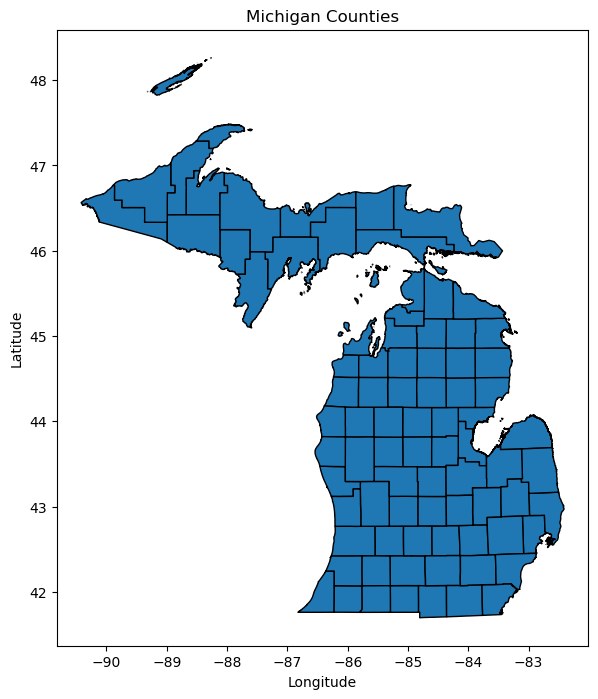

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define path to shapefile (escape backslashes or use raw string)
shp_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"

# Load shapefile
gdf = gpd.read_file(shp_path)

# Display basic info
print(gdf.head())
print(gdf.crs)

# Plot the shapefile
gdf.plot(edgecolor='black', figsize=(10, 8))
plt.title("Michigan Counties")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Biomass 2023 Analysis 

## 🌿 Step 2: Prepare Wood Biomass Market Data (2023)

The competition analysis begins with **Wood Biomass**. In this step, we **clip the 2023 biomass procurement zones** to Michigan's state boundary. This ensures that the dataset is spatially constrained to only include relevant regions within the study area.

### 🔧 Actions Performed:
- Loaded both the **Michigan county boundary** and the **2023 wood biomass competition zone** shapefiles
- Ensured both layers use the same **coordinate reference system (CRS)**
- **Clipped** the biomass shapefile to the Michigan extent using `GeoPandas.clip()`
- Saved the result as a new shapefile
- Visualized the clipped biomass zones over the Michigan base map

### 📁 Input:
- `biomass2023.shp` (uncropped biomass market zone)
- `Counties_(v17a).shp` (Michigan reference boundary)

### 📂 Output:
- `biomass2023_clipped.shp`: Biomass zones clipped to Michigan
- A map showing biomass market coverage within state bounds

### 🗺️ Visualization:
Green areas show where biomass procurement zones exist within Michigan in 2023.

```python
print(f"✅ Clipped shapefile saved to:\n{output_path}")


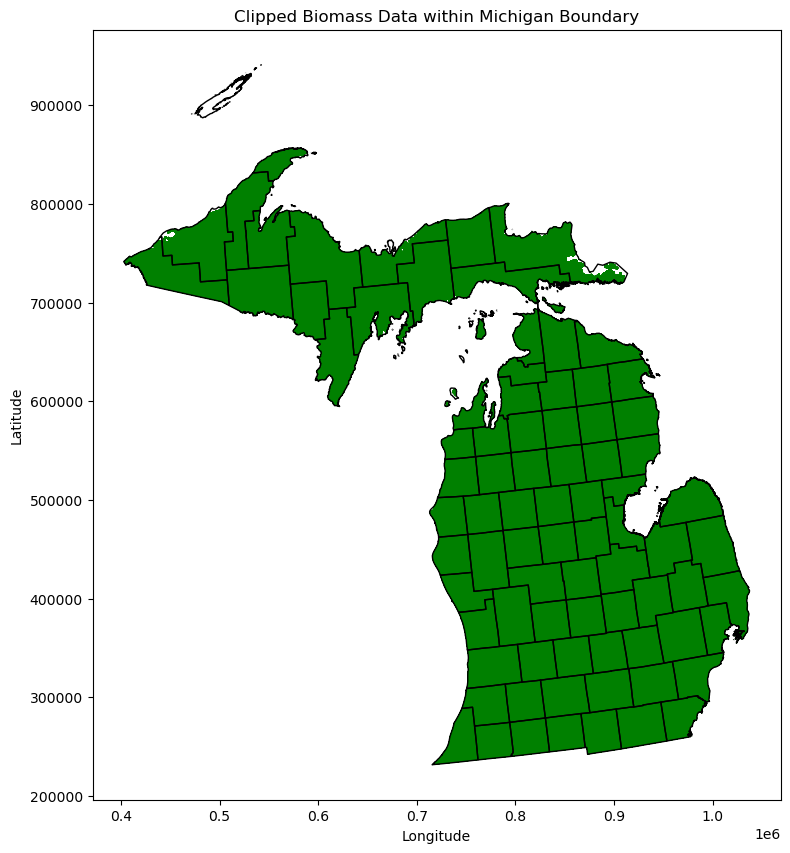

✅ Clipped shapefile saved to:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_clipped.shp


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# --- Paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
biomass_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023.shp"
output_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_clipped.shp"

# --- Load shapefiles ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_biomass = gpd.read_file(biomass_path)

# --- Ensure same CRS ---
if gdf_biomass.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_biomass.crs)

# --- Clip ---
gdf_clipped = gpd.clip(gdf_biomass, gdf_michigan)

# --- Save the clipped file ---
gdf_clipped.to_file(output_path)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=1)
gdf_clipped.plot(ax=ax, column=None, color='green', markersize=1)
plt.title("Clipped Biomass Data within Michigan Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(f"✅ Clipped shapefile saved to:\n{output_path}")


## 📋 Step 3: Inspect Clipped Biomass Shapefile Attributes

Before proceeding with competition level classification, we **examine the structure** of the clipped biomass shapefile to ensure the necessary attributes are present for analysis.

### 🔧 Actions Performed:
- Loaded the previously clipped shapefile: `biomass2023_clipped.shp`
- Printed the list of column names (attributes)
- Displayed the first few rows to preview data values and structure

### 📌 Why This Matters:
This inspection helps confirm:
- Whether a **competition metric** (e.g., number of overlapping facilities, gridcode, score, etc.) is already present  
- Which fields are useful for classification or visualization  
- That geometries and records loaded successfully

### 🧾 Output Preview:
```python
📋 Columns in the clipped shapefile:
['FID', 'geometry', 'gridcode', ...]

🔍 First few rows:
   FID  gridcode  geometry
0    0         3  POLYGON (...)
1    1         2  POLYGON (...)
...


In [3]:
import geopandas as gpd

# Path to the clipped shapefile
clipped_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_clipped.shp"

# Load the clipped shapefile
gdf_clipped = gpd.read_file(clipped_path)

# Print column names
print("📋 Columns in the clipped shapefile:")
print(gdf_clipped.columns.tolist())

# Optional: Preview the first few rows
print("\n🔍 First few rows:")
print(gdf_clipped.head())


📋 Columns in the clipped shapefile:
['FacilityID', 'Name', 'FromBreak', 'ToBreak', 'Shape_Leng', 'Shape_Area', 'geometry']

🔍 First few rows:
   FacilityID                  Name  FromBreak  ToBreak    Shape_Leng  \
0           6  Location 6 : 0 - 360        0.0    360.0  1.219066e+07   
1           6  Location 6 : 0 - 350        0.0    350.0  1.164115e+07   
2           6  Location 6 : 0 - 340        0.0    340.0  1.075875e+07   
3           6  Location 6 : 0 - 270        0.0    270.0  6.845999e+06   
4           6  Location 6 : 0 - 250        0.0    250.0  6.010930e+06   

     Shape_Area                                           geometry  
0  4.693450e+11  MULTIPOLYGON (((856851.276 779359.149, 856526....  
1  4.427079e+11  MULTIPOLYGON (((856126.276 780534.149, 855676....  
2  4.170663e+11  MULTIPOLYGON (((850176.276 781509.149, 850001....  
3  2.447613e+11  MULTIPOLYGON (((825326.276 685159.149, 825551....  
4  2.063406e+11  MULTIPOLYGON (((837501.276 654634.149, 837726....  


## ⏱️ Step 4: Filter Biomass Zones by Haul Time (ToBreak = 150)

In this step, we extract only those biomass procurement polygons that fall within a **150-minute haul time**, representing the realistic supply radius for biomass facilities in 2023.

### 🧭 Why 150 Minutes?
Based on accessibility modeling and facility-specific hauling thresholds, a **150-minute travel time** was identified as the limit within which biomass facilities can economically procure material.

### 🔧 Actions Performed:
- Loaded the previously clipped biomass shapefile
- **Filtered rows** where the `ToBreak` attribute equals `150`
- Saved the filtered polygons to a new shapefile
- Plotted the filtered zones in orange

### 📁 Input:
- `biomass2023_clipped.shp` (all biomass competition zones)

### 📂 Output:
- `biomass2023_ToBreak150.shp` (zones within 150-minute haul range)

### 🗺️ Visualization:
Orange polygons represent procurement areas accessible within 150 minutes of travel time from any biomass facility.

```python
print(f"✅ Filtered shapefile saved to:\n{output_path}")


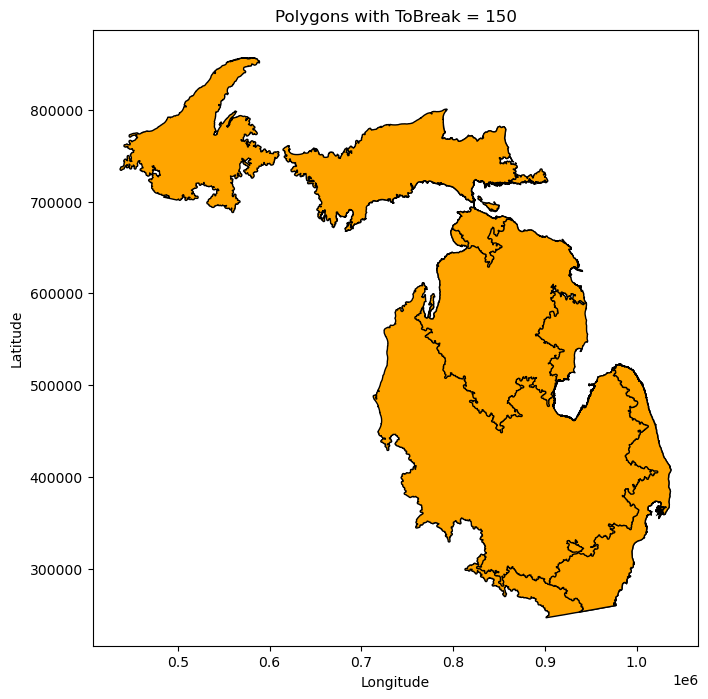

✅ Filtered shapefile saved to:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_ToBreak150.shp


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Input and output paths ---
clipped_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_clipped.shp"
output_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_ToBreak150.shp"

# --- Load clipped shapefile ---
gdf = gpd.read_file(clipped_path)

# --- Filter rows where ToBreak == 150 ---
gdf_150 = gdf[gdf['ToBreak'] == 150]

# --- Save to new shapefile ---
gdf_150.to_file(output_path)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 8))
gdf_150.plot(ax=ax, color='orange', edgecolor='black')
plt.title("Polygons with ToBreak = 150")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(f"✅ Filtered shapefile saved to:\n{output_path}")


## ✅ Step 5: Validate Biomass Procurement Zone Coverage

Before performing competition scoring, we validate that **all procurement zones for 2023 biomass facilities** have been successfully retained after filtering by the 150-minute haul threshold.

### 🔧 Actions Performed:
- Loaded the filtered shapefile (`biomass2023_ToBreak150.shp`)
- Printed the total number of polygons included

### 📋 Purpose:
This acts as a **sanity check** to confirm that all expected biomass facilities (in this case, **6 total**) have their procurement zones represented.

```python
Total zones: 6


In [9]:
import geopandas as gpd

# Load procurement zone shapefile
gdf = gpd.read_file(r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\biomass2023_ToBreak150.shp")
print(f"Total zones: {len(gdf)}")


Total zones: 6


## 🔄 Step 6: Compute Overlapping Procurement Zones (Competition Areas)

This step identifies **geographic zones where procurement areas from multiple biomass facilities intersect**, representing potential **competition zones**.

### 🔧 Actions Performed:
- Looped through each biomass facility’s procurement polygon
- Compared it against all other facilities’ polygons
- Identified **geometries that intersect** (i.e., overlap)
- Stored all overlapping areas in a new GeoDataFrame

### 🧠 Why This Matters:
Areas of overlap between procurement zones indicate **shared sourcing potential** — where **multiple facilities compete** for the same feedstock. These overlaps will later be used to calculate **competition intensity**.

### 📦 Tools:
- `tqdm` was used to display progress during pairwise intersection loops
- `GeoPandas` handled geometry operations and CRS consistency

### 🗂️ Output:
- A new `GeoDataFrame` (`gdf_overlap`) containing **all overlapping polygons** between different facility zones

```python
# Sample logic
if current_geom.intersects(other.geometry):
    inter = current_geom.intersection(other.geometry)


In [10]:
from tqdm import tqdm

# Create an empty GeoDataFrame to hold overlapping geometries
overlap_list = []

# Loop through each zone and intersect with others
for i, row in tqdm(gdf.iterrows(), total=len(gdf)):
    current_geom = row.geometry
    current_id = row.FacilityID

    # Compare with all other zones (excluding itself)
    for j, other in gdf[gdf.FacilityID != current_id].iterrows():
        if current_geom.intersects(other.geometry):
            inter = current_geom.intersection(other.geometry)
            if not inter.is_empty:
                overlap_list.append(inter)

# Combine all overlaps into a new GeoDataFrame
gdf_overlap = gpd.GeoDataFrame(geometry=overlap_list, crs=gdf.crs)


100%|██████████| 6/6 [00:03<00:00,  1.88it/s]


## 🧼 Step 7: Dissolve Overlaps into Unified Competition Zones

After identifying all overlapping procurement zones between facilities, we now **merge those overlaps** into a **single unified geometry** using `GeoPandas.dissolve()`.

### 🔧 Actions Performed:
- Used `gdf_overlap.dissolve()` to combine all intersecting polygons into a **clean, non-redundant geometry**
- Removed internal boundaries to create a seamless union of all competition zones

### 📌 Purpose:
This creates a simplified view of **where biomass competition exists**, regardless of how many facilities overlap. It forms the base for:
- Visualizing **the total footprint** of competitive areas
- Optionally rasterizing or counting **intensity of overlap**

### 🗂️ Output:
- `gdf_overlap_clean`: A `GeoDataFrame` with **one or more dissolved polygons** representing all competitive zones

```python
gdf_overlap_clean = gdf_overlap.dissolve()


In [11]:
# This merges all overlapping zones into clean unioned geometries
gdf_overlap_clean = gdf_overlap.dissolve()


## 🔢 Step 8: Calculate Competition Intensity by Overlap Count

This step assigns a **competition score** to each polygon in the dissolved overlap zones by counting **how many facilities** intersect that area — the more facilities, the higher the competitive pressure.

### 🔧 Actions Performed:

1. **Exploded** the dissolved overlap geometry into individual polygons  
2. Performed a **spatial join** between each polygon and the original facility zones  
3. Counted the **number of unique facilities** intersecting each polygon using `groupby().nunique()`  
4. **Merged** the resulting counts back with the polygon geometries to produce the final competition map

### 🧠 Why This Matters:
This generates a numerical metric:  
> `overlap_count = number of competing biomass facilities for each location`

Which will later be used to assign **competition levels** (e.g., Level 1 to 5).

### 🗂️ Output:
- `gdf_competition`: GeoDataFrame containing:
  - Individual polygons from the overlap area
  - A new column `overlap_count` indicating **how many facilities overlap** there

```python
# Example
overlap_count = 2  → 2 biomass facilities compete in this polygon


In [12]:
# Create unioned overlaps into polygons
overlap_polygons = gdf_overlap_clean.explode(index_parts=False).reset_index(drop=True)

# Spatial join to count how many original zones intersect each polygon
joined = gpd.sjoin(overlap_polygons, gdf[['geometry', 'FacilityID']], how="left", predicate="intersects")

# Count how many facilities intersect each overlap polygon
counts = joined.groupby(joined.index).FacilityID.nunique().reset_index(name="overlap_count")

# Merge back to geometry
gdf_competition = overlap_polygons.merge(counts, left_index=True, right_on="index")


## 🗺️ Step 9: Classify and Visualize Biomass Competition Hotspots

Now that we’ve calculated how many biomass facilities overlap in each polygon, we **classify these counts into categories** and visualize them as a **competition hotspot map**.

### 🔧 Actions Performed:

1. Defined a custom function `classify_overlap()` to group polygons by overlap count:
   - `"1 zone"` → No competition (only one facility)
   - `"2–3 zones"` → Moderate competition
   - `"4–5 zones"` → High competition
   - `"6+ zones"` → Extreme competition (hotspot)
2. Applied this classification to each row in `gdf_competition`
3. Used `GeoPandas.plot()` with a color scale (`OrRd`) to visualize competition intensity

### 🗂️ Output:
- `gdf_competition['class']`: New column containing categorical labels for competition level
- A **vector-based competition map** showing zones with 1, 2–3, 4–5, or 6+ overlapping procurement areas

### 🖼️ Visualization:
- Lighter colors = lower competition  
- Darker reds = higher overlap and more intense market pressure

```python
plt.title("Biomass Procurement Zone Competition (Vector-Based)")


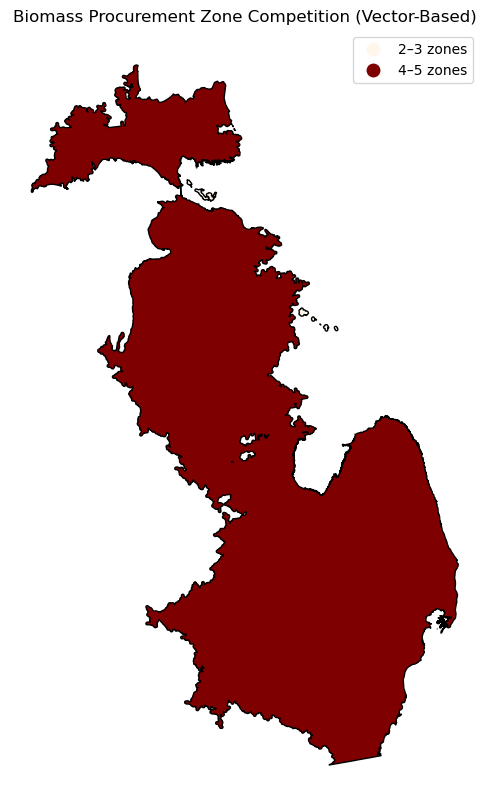

In [13]:
import matplotlib.pyplot as plt

# Categorize overlap levels
def classify_overlap(val):
    if val == 1:
        return "1 zone"
    elif val <= 3:
        return "2–3 zones"
    elif val <= 5:
        return "4–5 zones"
    else:
        return "6+ zones"

gdf_competition['class'] = gdf_competition['overlap_count'].apply(classify_overlap)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
gdf_competition.plot(column='class', ax=ax, legend=True, cmap="OrRd", edgecolor='black')
plt.title("Biomass Procurement Zone Competition (Vector-Based)")
plt.axis("off")
plt.show()


## 🗃️ Step 10: Export Competition Zones by Intensity Category

In the final step of the biomass competition analysis, we **categorize and export** the competition zones into separate shapefiles based on their **overlap count (`COUNT_`)**. This allows for easier mapping, symbology control, and sharing of results.

### 🔧 Actions Performed:

1. Loaded the full biomass competition shapefile: `countoverlapbio2023.shp`
2. Defined classification logic:
   - **Lowest** → `COUNT_ == 1` (no competition)
   - **Low** → `COUNT_ == 2 or 3` (light competition)
   - **Medium** → `COUNT_ == 4` (moderate competition)
3. Filtered the data into subsets for each category
4. Saved each subset as a new shapefile with descriptive filenames

### 📂 Output:
Each of the following shapefiles is saved in the `Biomass` directory:

| File Name                   | Description                        |
|----------------------------|------------------------------------|
| `competition_lowest.shp`   | Biomass zones with no competition  |
| `competition_low.shp`      | Zones with 2–3 overlapping facilities |
| `competition_medium.shp`   | Zones with 4 overlapping facilities |

```python
print(f"✅ Saved: {out_fp} ({len(subset)} features)")


In [14]:
import geopandas as gpd
import os

# Input shapefile
input_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\countoverlapbio2023.shp"

# Output directory
output_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass"
os.makedirs(output_dir, exist_ok=True)

# Load the shapefile
gdf = gpd.read_file(input_fp)

# Define categories and their filters
categories = {
    'Lowest': gdf[gdf['COUNT_'] == 1],
    'Low': gdf[gdf['COUNT_'].isin([2, 3])],
    'Medium': gdf[gdf['COUNT_'] == 4]
}

# Save each category to separate shapefile
for label, subset in categories.items():
    out_fp = os.path.join(output_dir, f"competition_{label.lower()}.shp")
    subset.to_file(out_fp)
    print(f"✅ Saved: {out_fp} ({len(subset)} features)")


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_lowest.shp (6 features)
✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_low.shp (9 features)
✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_medium.shp (1 features)


## 🖼️ Step 11: Visualize Biomass Competition Classes (Final Map)

This final step presents a **thematic map** showing **biomass procurement competition zones** in Michigan for the year **2023**, based on the number of overlapping facilities.

### 🔧 Actions Performed:

1. Loaded Michigan county boundaries and three competition category shapefiles:
   - `competition_lowest.shp` (Level 1)
   - `competition_low.shp` (Levels 2–3)
   - `competition_medium.shp` (Levels 4–5)
2. Reprojected all layers to a common CRS (if needed)
3. Plotted each competition class using a distinct color
4. Added a **custom legend** using `matplotlib.patches.Patch` for clear interpretation

### 🎨 Color Mapping:

### 🎨 Color Mapping:

| Competition Level | Description               | Color Code | Visual Hint       |
|-------------------|---------------------------|------------|-------------------|
| 1 – Lowest        | No overlap (1 facility)    | `#ff9999`  | 🟥 Light Red/Pink |
| 2–3 – Low         | Light overlap (2–3)        | `#ffff99`  | 🟨 Light Yellow   |
| 4–5 – Medium      | Moderate overlap (4–5)     | `#99ffff`  | 🟦 Light Cyan     |
| 6–7 – High (optional) | High overlap (6–7+) | `#9999ff`  | 🟪 Light Blue/Purple |


### 🖼️ Output:
- A final map with all competition zones displayed by **intensity class**
- Counties shown in black outline for geographic context
- Legend included for visual interpretation

```python
plt.title("Biomass Procurement Competition in Michigan – 2023")


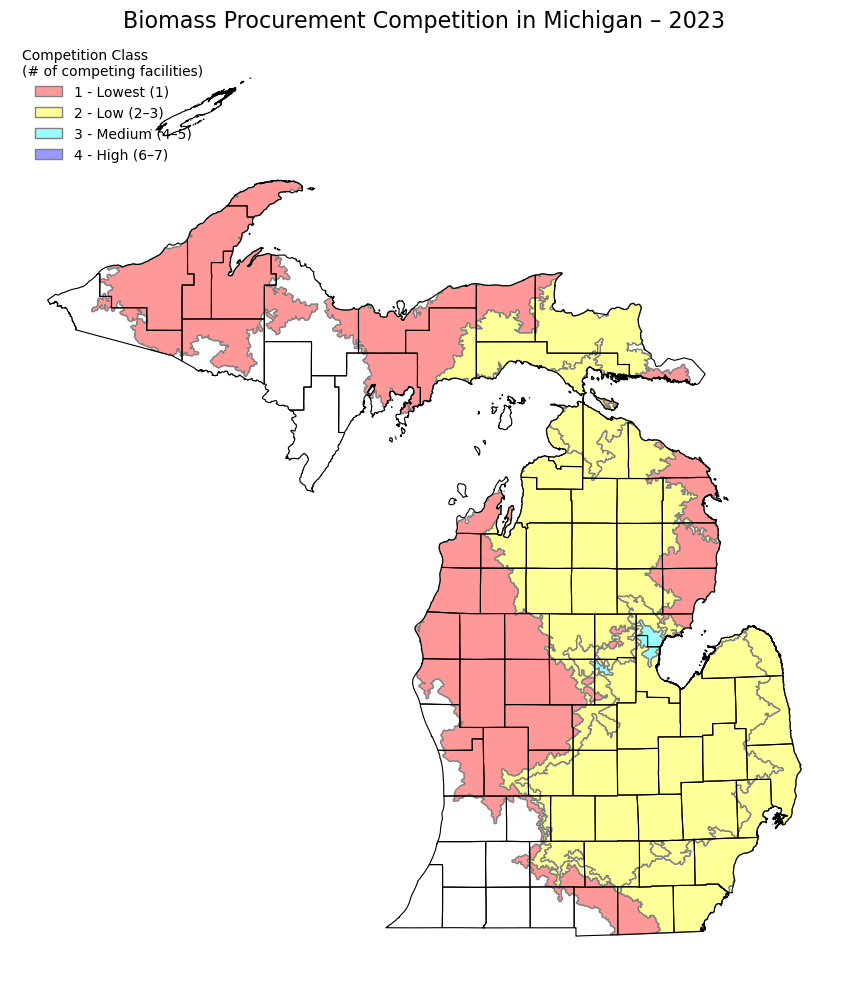

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
lowest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_lowest.shp"
low_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_low.shp"
medium_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Biomass\competition_medium.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)

# --- Ensure same CRS ---
common_crs = gdf_michigan.crs
gdf_lowest = gdf_lowest.to_crs(common_crs)
gdf_low    = gdf_low.to_crs(common_crs)
gdf_medium = gdf_medium.to_crs(common_crs)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# --- Plot competition zones ---
gdf_lowest.plot(ax=ax, color='#ff9999', edgecolor='grey')   # Level 1 - pink/red
gdf_low.plot(ax=ax, color='#ffff99', edgecolor='grey')      # Level 2–3 - yellow
gdf_medium.plot(ax=ax, color='#99ffff', edgecolor='grey')   # Level 4–5 - cyan

# --- Custom legend ---
legend_elements = [
    Patch(facecolor='#ff9999', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)'),
    Patch(facecolor='#99ffff', edgecolor='grey', label='3 - Medium (4–5)'),
    Patch(facecolor='#9999ff', edgecolor='grey', label='4 - High (6–7)')  # Optional future level
]

ax.legend(
    handles=legend_elements,
    title='Competition Class\n(# of competing facilities)',
    loc='upper left',
    frameon=False
)

# --- Final layout ---
plt.title("Biomass Procurement Competition in Michigan – 2023", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


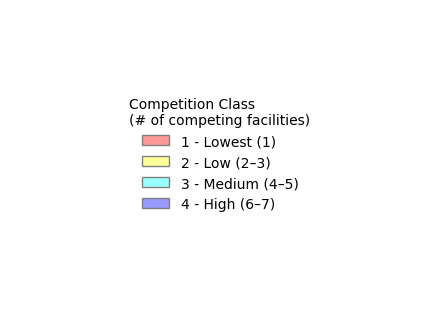

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Corrected color legend for Biomass Competition Classes ---
legend_elements = [
    Patch(facecolor='#ff9999', edgecolor='grey', label='1 - Lowest (1)'),       # Light red/pink
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)'),        # Light yellow
    Patch(facecolor='#99ffff', edgecolor='grey', label='3 - Medium (4–5)'),     # Light cyan
    Patch(facecolor='#9999ff', edgecolor='grey', label='4 - High (6–7)')        # Light purple/blue
]

# --- Create a standalone legend figure ---
fig, ax = plt.subplots(figsize=(4.5, 3.2))
fig.patch.set_facecolor('white')
ax.axis('off')

legend = ax.legend(
    handles=legend_elements,
    title='Competition Class\n(# of competing facilities)',
    loc='center',
    frameon=False
)

plt.tight_layout()
plt.show()


# Hardwood

**Saving for 290 Minutes**

In [1]:
import geopandas as gpd
import os

# --- Input: Full hardwood layer from File GDB ---
gdb_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Data.gdb"
layer_name = "Hardwood"

# --- Output: Filtered file ---
output_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290.gpkg"
output_layer = "hardwood_290"

# --- Load the hardwood layer ---
gdf = gpd.read_file(gdb_path, layer=layer_name)

# --- Filter rows where ToBreak == 290 ---
gdf_290 = gdf[gdf['ToBreak'] == 290]

# --- Save filtered result ---
os.makedirs(os.path.dirname(output_gpkg), exist_ok=True)
gdf_290.to_file(output_gpkg, layer=output_layer, driver="GPKG")

print(f"✅ Filtered Hardwood (ToBreak = 290) saved to:\n{output_gpkg} [Layer: {output_layer}]")


✅ Filtered Hardwood (ToBreak = 290) saved to:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290.gpkg [Layer: hardwood_290]


**Clipping for Michigan**

In [2]:
import geopandas as gpd
import os

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
input_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290.gpkg"
input_layer = "hardwood_290"

# --- Output path ---
output_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290_clipped.shp"

# --- Load datasets ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_290 = gpd.read_file(input_gpkg, layer=input_layer)

# --- Ensure same CRS ---
if gdf_290.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_290.crs)

# --- Clip ---
gdf_clipped = gpd.clip(gdf_290, gdf_michigan)

# --- Save output as shapefile ---
os.makedirs(os.path.dirname(output_path), exist_ok=True)
gdf_clipped.to_file(output_path)

print(f"✅ Clipped Hardwood 290-min zones to Michigan saved at:\n{output_path}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_6320\1790858157.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_clipped.to_file(output_path)


✅ Clipped Hardwood 290-min zones to Michigan saved at:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290_clipped.shp


**Visualize**

C:\Users\khanalna\AppData\Local\Temp\ipykernel_6320\714890486.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


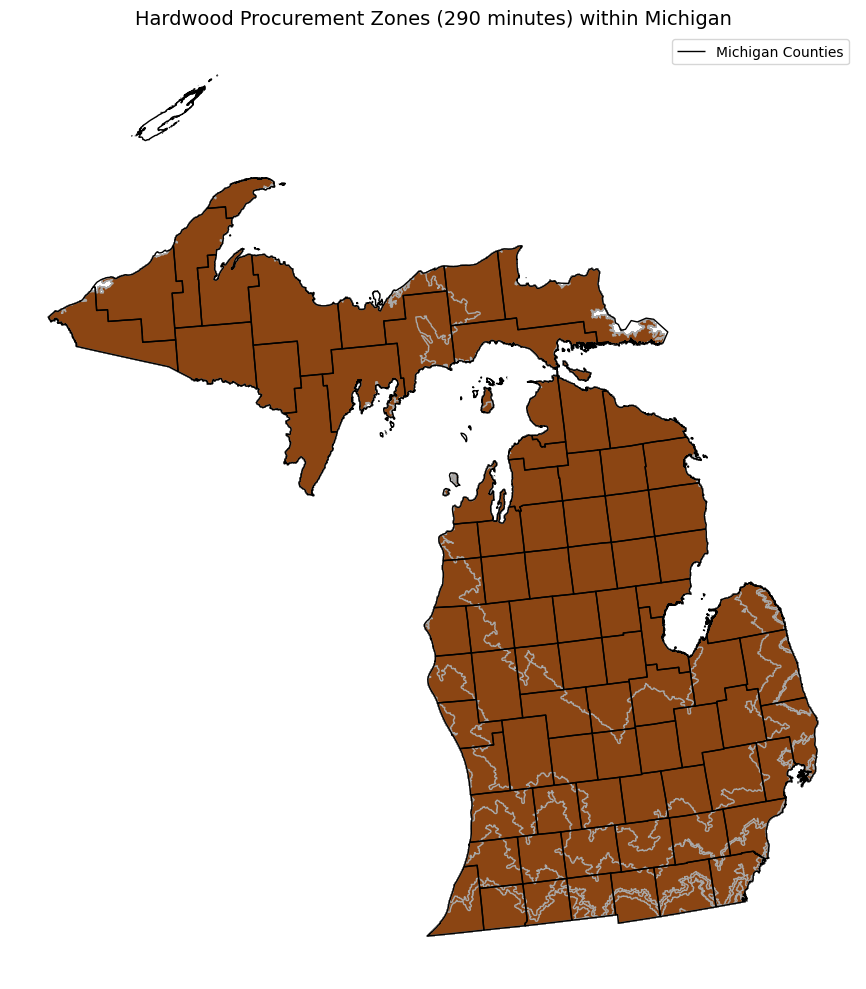

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
clipped_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hardwood_290_clipped.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_clipped = gpd.read_file(clipped_path)

# --- Ensure same CRS ---
if gdf_clipped.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_clipped.crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=1, label='Michigan Counties')
gdf_clipped.plot(ax=ax, color='saddlebrown', edgecolor='darkgrey', label='Hardwood (ToBreak = 290)')

plt.title("Hardwood Procurement Zones (290 minutes) within Michigan", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()


# Shp file for each competition level

In [6]:
import geopandas as gpd
import os

# --- Input: Hardwood overlap shapefile ---
input_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\hard2023_overlap_zones.shp"

# --- Output directory ---
output_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved"
os.makedirs(output_dir, exist_ok=True)

# --- Load data ---
gdf = gpd.read_file(input_fp)

# --- Define competition level filters ---
categories = {
    'lowest':  gdf[(gdf['COUNT_'] >= 1) & (gdf['COUNT_'] <= 48)],
    'low':     gdf[(gdf['COUNT_'] >= 49) & (gdf['COUNT_'] <= 96)],
    'medium':  gdf[(gdf['COUNT_'] >= 97) & (gdf['COUNT_'] <= 144)],
    'high':    gdf[(gdf['COUNT_'] >= 145) & (gdf['COUNT_'] <= 192)],
    'highest': gdf[gdf['COUNT_'] >= 193]
}

# --- Save each category as a single-row dissolved shapefile ---
for label, subset in categories.items():
    if subset.empty:
        continue
    # Add dummy field to dissolve on
    subset['class'] = label
    dissolved = subset.dissolve(by='class', as_index=False)
    out_fp = os.path.join(output_dir, f"hardwood_competition_{label}.shp")
    dissolved.to_file(out_fp)
    print(f"✅ Saved: {out_fp} ({len(dissolved)} polygon row)")


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_lowest.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_low.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_medium.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_high.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_highest.shp (1 polygon row)


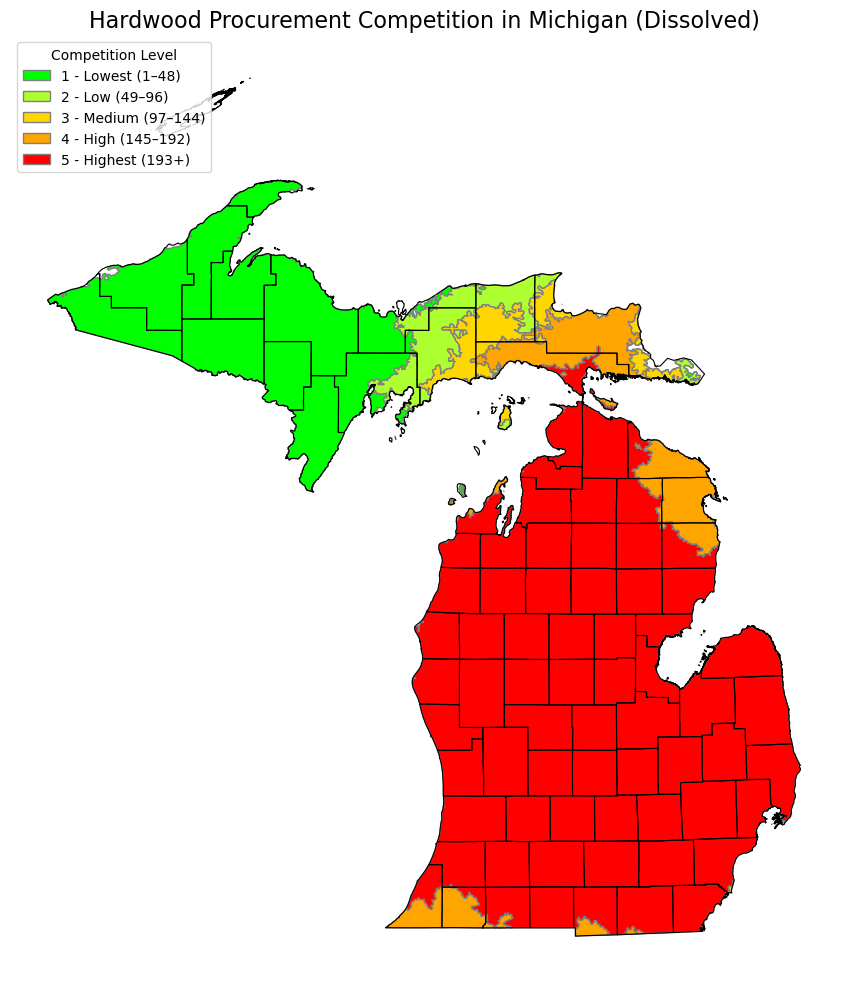

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"

lowest_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_lowest.shp"
low_fp     = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_low.shp"
medium_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_medium.shp"
high_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_high.shp"
highest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_highest.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)
gdf_high     = gpd.read_file(high_fp)
gdf_highest  = gpd.read_file(highest_fp)

# --- Reproject to match base map CRS ---
common_crs = gdf_michigan.crs
layers = [gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest]
layers = [gdf.to_crs(common_crs) for gdf in layers]
gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest = layers

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
gdf_lowest.plot(ax=ax, color='#00FF00', edgecolor='grey')   # Bright green
gdf_low.plot(ax=ax, color='#ADFF2F', edgecolor='grey')      # Chartreuse
gdf_medium.plot(ax=ax, color='#FFD700', edgecolor='grey')   # Gold
gdf_high.plot(ax=ax, color='#FFA500', edgecolor='grey')     # Orange
gdf_highest.plot(ax=ax, color='#FF0000', edgecolor='grey')  # Red

# Create manual legend
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest (1–48)'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low (49–96)'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium (97–144)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High (145–192)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (193+)')
]

# Add legend box
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# Final layout
plt.title("Hardwood Procurement Competition in Michigan (Dissolved)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


# Saving for rFIA

In [68]:
import geopandas as gpd
import pandas as pd  # ✅ Add this line
import os

# Define file paths
lowest_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_lowest.shp"
low_fp     = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_low.shp"
medium_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_medium.shp"
high_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_high.shp"
highest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\competition_levels_dissolved\hardwood_competition_highest.shp"

# Output file path
output_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\R\hardwood_competition_all_levels.shp"

# Load shapefiles and assign level
gdf_lowest  = gpd.read_file(lowest_fp)
gdf_low     = gpd.read_file(low_fp)
gdf_medium  = gpd.read_file(medium_fp)
gdf_high    = gpd.read_file(high_fp)
gdf_highest = gpd.read_file(highest_fp)

gdf_lowest["level"]  = 1
gdf_low["level"]     = 2
gdf_medium["level"]  = 3
gdf_high["level"]    = 4
gdf_highest["level"] = 5

# Combine all GeoDataFrames
combined_gdf = gpd.GeoDataFrame(pd.concat([
    gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest
], ignore_index=True), crs=gdf_lowest.crs)

# Save to a single shapefile
combined_gdf.to_file(output_fp)

print(f"✅ Combined shapefile saved at: {output_fp}")


✅ Combined shapefile saved at: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Hard\R\hardwood_competition_all_levels.shp


# Softwood Sawlogs

## 🌲 Step 1: Filter Softwood Procurement Zones by Haul Time (ToBreak = 190)

This step begins the competition analysis for **Softwood Sawlogs (2023)** by filtering procurement zones based on a **190-minute haul time threshold** — the estimated maximum distance softwood mills are able to economically source material.

### 🔧 Actions Performed:

1. Loaded the **Softwood** layer from a File Geodatabase (`Data.gdb`)
2. Filtered only those features where `ToBreak == 190`
3. Saved the result as a **GeoPackage** (`softwood_190.gpkg`) for downstream spatial analysis

### 📌 Why 190 Minutes?
190 minutes was determined as the **maximum feasible haul time** for softwood sawlog procurement in this region, based on road network modeling and operational cost constraints.

### 📁 Input:
- File GDB: `Data.gdb`  
- Layer: `Softwood`

### 📂 Output:
- GeoPackage: `softwood_190.gpkg`  
- Layer inside GeoPackage: `softwood_190`

```python
print(f"✅ Filtered Softwood (ToBreak = 190) saved to:\n{output_gpkg} [Layer: {output_layer}]")


In [9]:
import geopandas as gpd
import os

# --- Input: Full softwood layer from File GDB ---
gdb_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Data.gdb"
layer_name = "Softwood"

# --- Output: Filtered file ---
output_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190.gpkg"
output_layer = "softwood_190"

# --- Load the softwood layer ---
gdf = gpd.read_file(gdb_path, layer=layer_name)

# --- Filter rows where ToBreak == 190 ---
gdf_190 = gdf[gdf['ToBreak'] == 190]

# --- Save filtered result ---
os.makedirs(os.path.dirname(output_gpkg), exist_ok=True)
gdf_190.to_file(output_gpkg, layer=output_layer, driver="GPKG")

print(f"✅ Filtered Softwood (ToBreak = 190) saved to:\n{output_gpkg} [Layer: {output_layer}]")


✅ Filtered Softwood (ToBreak = 190) saved to:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190.gpkg [Layer: softwood_190]


## ✂️ Step 2: Clip 190-Minute Softwood Procurement Zones to Michigan Boundary

After filtering softwood procurement zones by haul time (190 minutes), we now **clip them to the Michigan state boundary**. This ensures all analysis is spatially constrained to the study region.

### 🔧 Actions Performed:

1. Loaded:
   - Michigan county boundaries shapefile
   - The filtered 190-minute softwood procurement zones (`softwood_190` layer from GeoPackage)
2. Checked and matched **coordinate reference systems (CRS)**
3. Used `GeoPandas.clip()` to clip procurement zones to Michigan's borders
4. Saved the result as a new shapefile: `softwood_190_clipped.shp`

### 📁 Input:
- Boundary: `Counties_(v17a).shp` (Michigan counties)
- Zones: `softwood_190.gpkg` (filtered softwood procurement areas)

### 📂 Output:
- `softwood_190_clipped.shp`: Procurement areas restricted to Michigan only

```python
print(f"✅ Clipped Softwood 190-min zones to Michigan saved at:\n{output_path}")


In [10]:
import geopandas as gpd
import os

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
input_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190.gpkg"
input_layer = "softwood_190"

# --- Output path ---
output_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190_clipped.shp"

# --- Load datasets ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_190 = gpd.read_file(input_gpkg, layer=input_layer)

# --- Ensure same CRS ---
if gdf_190.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_190.crs)

# --- Clip ---
gdf_clipped = gpd.clip(gdf_190, gdf_michigan)

# --- Save output as shapefile ---
os.makedirs(os.path.dirname(output_path), exist_ok=True)
gdf_clipped.to_file(output_path)

print(f"✅ Clipped Softwood 190-min zones to Michigan saved at:\n{output_path}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_6320\1190764080.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_clipped.to_file(output_path)


✅ Clipped Softwood 190-min zones to Michigan saved at:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190_clipped.shp


## 🗺️ Step 3: Visualize 190-Minute Softwood Procurement Zones within Michigan

This step generates a **base map** showing the filtered softwood procurement zones (within a 190-minute haul time) overlaid on the Michigan state boundary.

### 🔧 Actions Performed:

1. Loaded:
   - Michigan county boundaries (`Counties_(v17a).shp`)
   - Clipped softwood procurement zones (`softwood_190_clipped.shp`)
2. Verified and matched coordinate systems
3. Plotted:
   - **County boundaries** in black
   - **Softwood procurement zones** in dark green with light grey edges

### 🎯 Purpose:
This plot confirms that all procurement zones:
- Are **correctly located within Michigan**
- Align with the state boundary
- Represent the **expected sourcing range** for 2023 softwood mills

### 🗂️ Output:
- A matplotlib-based map figure for visual QA or report inclusion

```python
plt.title("Softwood Procurement Zones (190 minutes) within Michigan")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_6320\2048296867.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


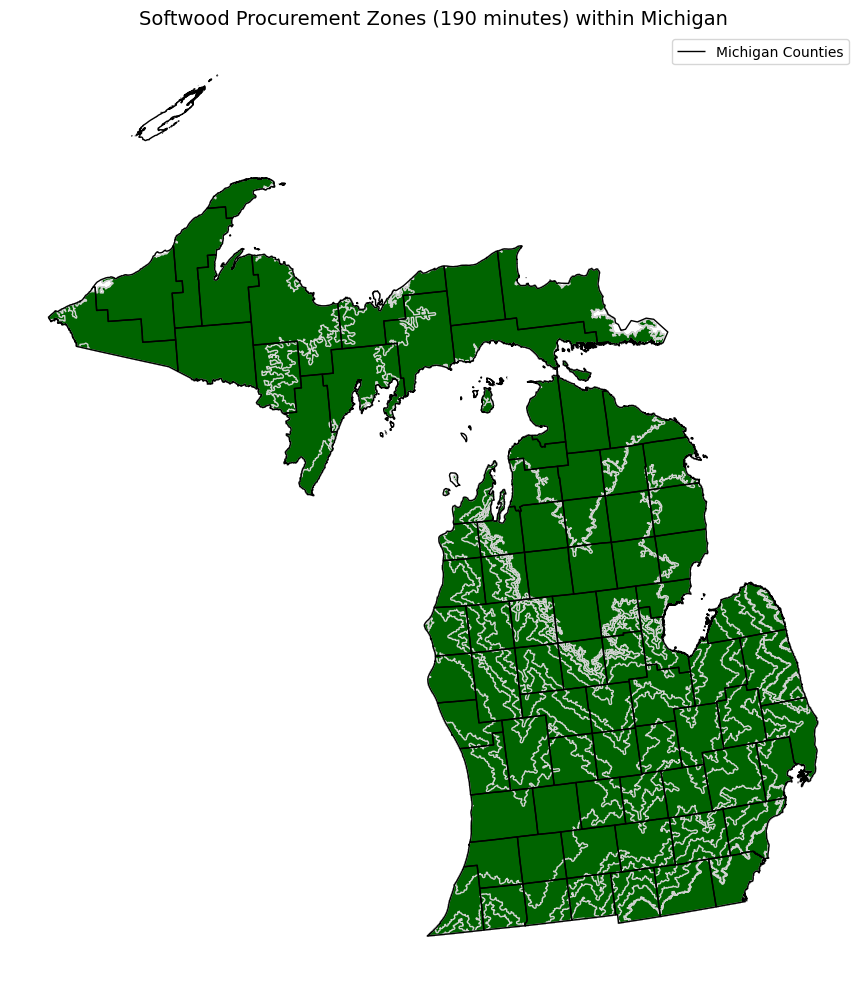

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
clipped_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\softwood_190_clipped.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_clipped = gpd.read_file(clipped_path)

# --- Ensure same CRS ---
if gdf_clipped.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_clipped.crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=1, label='Michigan Counties')
gdf_clipped.plot(ax=ax, color='darkgreen', edgecolor='lightgrey', label='Softwood (ToBreak = 190)')

plt.title("Softwood Procurement Zones (190 minutes) within Michigan", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()


## 🧭 Step 4: Classify and Dissolve Softwood Competition Zones by Intensity

In this step, we group softwood procurement competition zones into **five competition intensity levels** based on the number of overlapping facilities, and **dissolve each category** into a single unified polygon for mapping and analysis.

### 🔧 Actions Performed:

1. Loaded the **softwood overlap shapefile**: `soft_overlap_zones.shp`
2. Defined five competition classes based on `COUNT_` (number of overlapping zones):
   - **Lowest**: 1–12 overlaps
   - **Low**: 13–22 overlaps
   - **Medium**: 23–32 overlaps
   - **High**: 33–42 overlaps
   - **Highest**: 43+ overlaps
3. Created a dummy column (`'class'`) for dissolving each subset
4. **Dissolved** each category into one polygon using `GeoPandas.dissolve()`
5. Saved each category to its own shapefile in a new folder

### 📁 Input:
- `soft_overlap_zones.shp`: Raw softwood overlap zones with `COUNT_` values

### 📂 Output:
Each category is saved to a separate shapefile in the `competition_levels_dissolved` folder:
| File | Description |
|------|-------------|
| `softwood_competition_lowest.shp`  | Zones with lowest competition (1–12 overlaps) |
| `softwood_competition_low.shp`     | Zones with low competition (13–22) |
| `softwood_competition_medium.shp`  | Zones with medium competition (23–32) |
| `softwood_competition_high.shp`    | Zones with high competition (33–42) |
| `softwood_competition_highest.shp` | Zones with highest competition (43+) |

```python
print(f"✅ Saved: {out_fp} ({len(dissolved)} polygon row)")


In [12]:
import geopandas as gpd
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- Input: Softwood overlap shapefile ---
input_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\soft_overlap_zones.shp"

# --- Output directory ---
output_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved"
os.makedirs(output_dir, exist_ok=True)

# --- Load data ---
gdf = gpd.read_file(input_fp)

# --- Define competition level filters based on softwood legend ---
categories = {
    'lowest':  gdf[(gdf['COUNT_'] >= 1) & (gdf['COUNT_'] <= 12)],
    'low':     gdf[(gdf['COUNT_'] >= 13) & (gdf['COUNT_'] <= 22)],
    'medium':  gdf[(gdf['COUNT_'] >= 23) & (gdf['COUNT_'] <= 32)],
    'high':    gdf[(gdf['COUNT_'] >= 33) & (gdf['COUNT_'] <= 42)],
    'highest': gdf[gdf['COUNT_'] >= 43]
}

# --- Save each category as a single-row dissolved shapefile ---
for label, subset in categories.items():
    if subset.empty:
        print(f"⚠️ Skipped {label} (no features)")
        continue
    subset['class'] = label  # Dummy field for dissolve
    dissolved = subset.dissolve(by='class', as_index=False)
    out_fp = os.path.join(output_dir, f"softwood_competition_{label}.shp")
    dissolved.to_file(out_fp)
    print(f"✅ Saved: {out_fp} ({len(dissolved)} polygon row)")


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_lowest.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_low.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_medium.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_high.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_highest.shp (1 polygon row)


## 🗺️ Step 5: Visualize Softwood Procurement Competition Levels (Final Map)

This final step creates a **classified competition map** of softwood procurement zones in Michigan, based on the number of overlapping facility haul zones (190-minute threshold). The map uses **dissolved zones** for each competition level to create a clean, color-coded output.

### 🔧 Actions Performed:

1. Loaded:
   - Michigan county boundaries for geographic context
   - Five dissolved softwood competition layers:
     - `softwood_competition_lowest.shp`
     - `softwood_competition_low.shp`
     - `softwood_competition_medium.shp`
     - `softwood_competition_high.shp`
     - `softwood_competition_highest.shp`
2. Ensured all layers shared a common CRS
3. Plotted each competition level with a distinct color
4. Created a **manual legend** for interpretability

### 🎨 Color Coding:

| Level | Description            | Color Code | Visual Hint         |
|-------|------------------------|------------|----------------------|
| 1     | Lowest (1–12 overlaps) | `#D9D9D9`  | 🩶 Light Gray        |
| 2     | Low (13–22)            | `#FFA500`  | 🟧 Orange            |
| 3     | Medium (23–32)         | `#90EE90`  | 🟩 Light Green       |
| 4     | High (33–42)           | `#0000FF`  | 🟦 Blue              |
| 5     | Highest (43+)          | `#FF0000`  | 🟥 Red (Hotspot)     |

### 🖼️ Output:
- A clean competition hotspot map for softwood procurement zones in 2023  
- Includes clear category boundaries and legend  
- Useful for reports, visual analysis, or policy communication

```python
plt.title("Softwood Procurement Competition in Michigan (Dissolved)", fontsize=16)


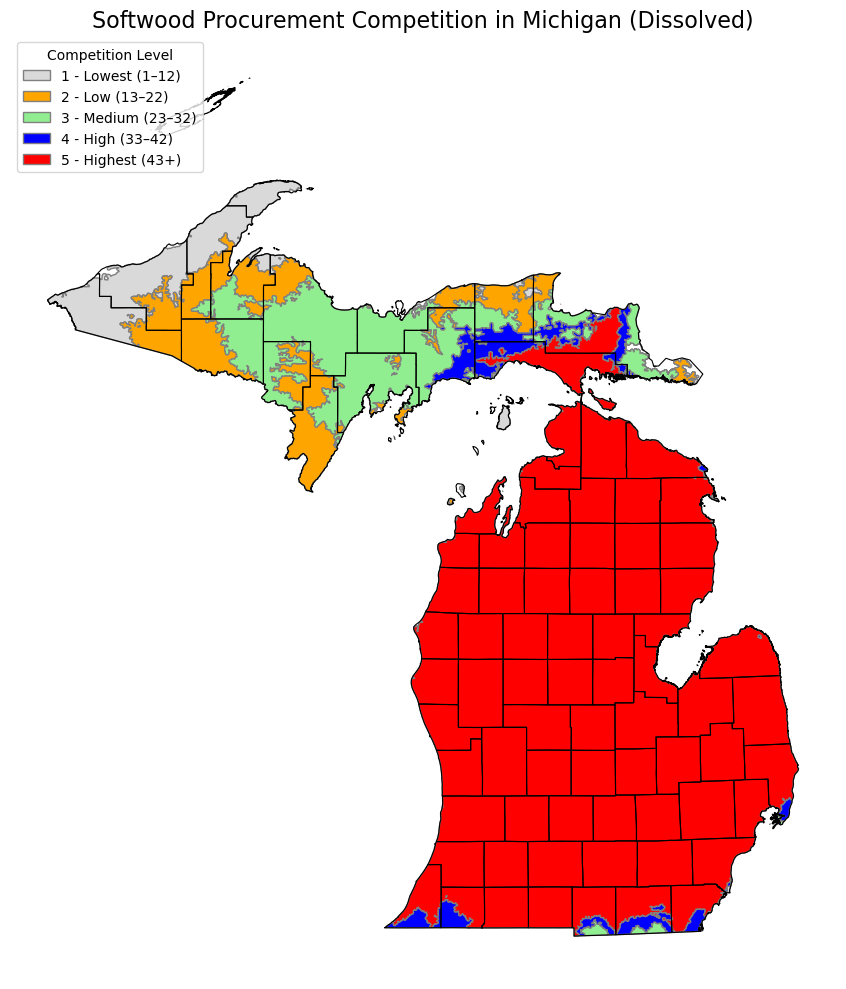

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"

lowest_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_lowest.shp"
low_fp     = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_low.shp"
medium_fp  = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_medium.shp"
high_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_high.shp"
highest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\competition_levels_dissolved\softwood_competition_highest.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)
gdf_high     = gpd.read_file(high_fp)
gdf_highest  = gpd.read_file(highest_fp)

# --- Reproject to match base map CRS ---
common_crs = gdf_michigan.crs
layers = [gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest]
layers = [gdf.to_crs(common_crs) for gdf in layers]
gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest = layers

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level (colors based on your legend)
gdf_lowest.plot(ax=ax, color='#D9D9D9', edgecolor='grey')  # Gray
gdf_low.plot(ax=ax, color='#FFA500', edgecolor='grey')     # Orange
gdf_medium.plot(ax=ax, color='#90EE90', edgecolor='grey')  # Light Green
gdf_high.plot(ax=ax, color='#0000FF', edgecolor='grey')    # Blue
gdf_highest.plot(ax=ax, color='#FF0000', edgecolor='grey') # Red

# Create manual legend
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

# Add legend box
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# Final layout
plt.title("Softwood Procurement Competition in Michigan (Dissolved)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


## 💾 Step 6: Export Combined Softwood Competition Zones for rFIA Analysis

To support downstream biomass or timber volume estimation using the **rFIA package in R**, the final processed softwood competition zones are exported as a clean shapefile.

### 🔧 Actions Performed:

1. Ensured the output directory exists using `os.makedirs()`
2. Saved the `combined_gdf` (merged GeoDataFrame of all competition zones) as a shapefile
3. Printed the output path for verification

### 📁 Input:
- `combined_gdf`: Final GeoDataFrame containing processed spatial zones (e.g., dissolved or unioned competition zones)

### 📂 Output:
- A shapefile suitable for use in `rFIA::biomass()`, `rFIA::volume()`, or `rFIA::grow()` functions
- Fully clipped and cleaned spatial geometry

```python
print(f"✅ Softwood combined shapefile saved at: {output_fp}")


In [70]:
# Ensure the output directory exists
output_dir = os.path.dirname(output_fp)
os.makedirs(output_dir, exist_ok=True)

# Save the merged shapefile
combined_gdf.to_file(output_fp)

print(f"✅ Softwood combined shapefile saved at: {output_fp}")


✅ Softwood combined shapefile saved at: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Soft\R\softwood_competition_all_levels.shp


# Pulpwood

In [14]:
import geopandas as gpd
import os

# --- Input: Full pulpwood layer from File GDB ---
gdb_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Data.gdb"
layer_name = "Pulpwood"

# --- Output: Filtered file ---
output_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170.gpkg"
output_layer = "pulpwood_170"

# --- Load the pulpwood layer ---
gdf = gpd.read_file(gdb_path, layer=layer_name)

# --- Filter rows where ToBreak == 170 ---
gdf_170 = gdf[gdf['ToBreak'] == 170]

# --- Save filtered result ---
os.makedirs(os.path.dirname(output_gpkg), exist_ok=True)
gdf_170.to_file(output_gpkg, layer=output_layer, driver="GPKG")

print(f"✅ Filtered Pulpwood (ToBreak = 170) saved to:\n{output_gpkg} [Layer: {output_layer}]")


✅ Filtered Pulpwood (ToBreak = 170) saved to:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170.gpkg [Layer: pulpwood_170]


In [15]:
import geopandas as gpd
import os

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
input_gpkg = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170.gpkg"
input_layer = "pulpwood_170"

# --- Output path ---
output_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170_clipped.shp"

# --- Load datasets ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_pulp = gpd.read_file(input_gpkg, layer=input_layer)

# --- Ensure same CRS ---
if gdf_pulp.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_pulp.crs)

# --- Clip ---
gdf_clipped = gpd.clip(gdf_pulp, gdf_michigan)

# --- Save output as shapefile ---
os.makedirs(os.path.dirname(output_path), exist_ok=True)
gdf_clipped.to_file(output_path)

print(f"✅ Clipped Pulpwood 170-min zones to Michigan saved at:\n{output_path}")


✅ Clipped Pulpwood 170-min zones to Michigan saved at:
C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170_clipped.shp


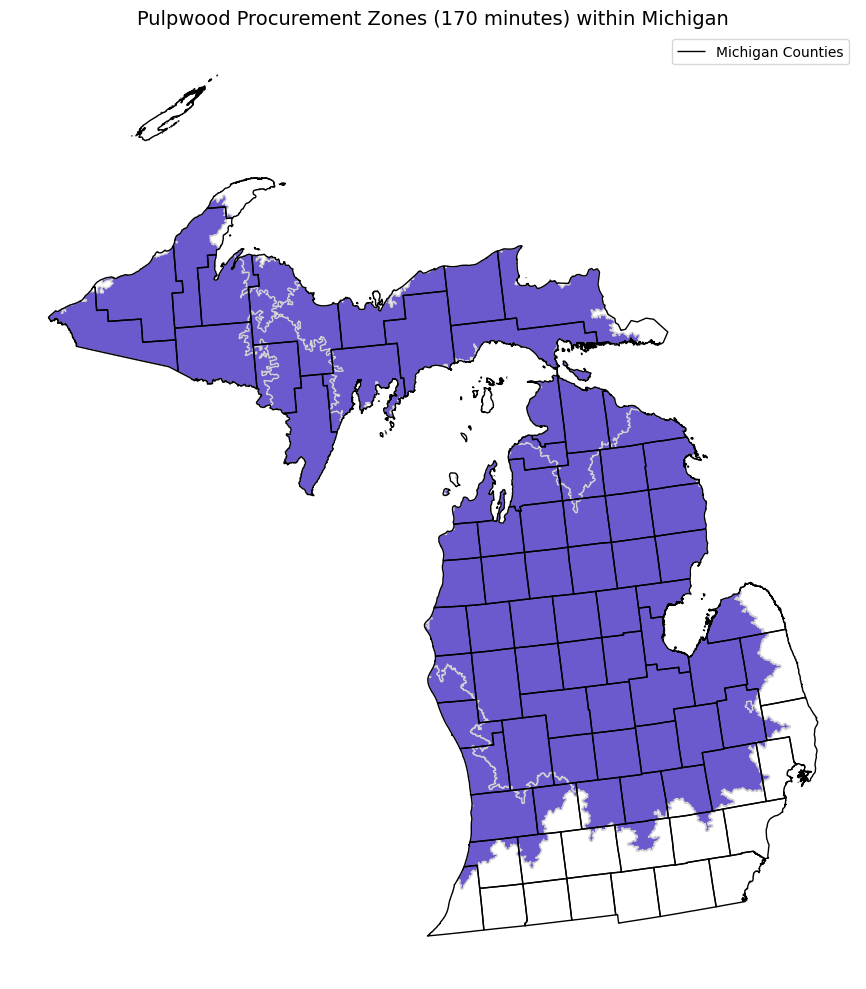

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Input paths ---
michigan_path = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
clipped_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_170_clipped.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_path)
gdf_clipped = gpd.read_file(clipped_path)

# --- Ensure same CRS ---
if gdf_clipped.crs != gdf_michigan.crs:
    gdf_michigan = gdf_michigan.to_crs(gdf_clipped.crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=1, label='Michigan Counties')
gdf_clipped.plot(ax=ax, color='slateblue', edgecolor='lightgrey', label='Pulpwood (ToBreak = 170)')

plt.title("Pulpwood Procurement Zones (170 minutes) within Michigan", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()


# Saving competition level

In [17]:
import geopandas as gpd
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- Input: Pulpwood overlap shapefile ---
input_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulp_overlap.shp"

# --- Output directory ---
output_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved"
os.makedirs(output_dir, exist_ok=True)

# --- Load data ---
gdf = gpd.read_file(input_fp)

# --- Define competition level filters based on pulp legend ---
categories = {
    'lowest': gdf[gdf['COUNT_'] == 1],
    'low':    gdf[gdf['COUNT_'] >= 2]
}

# --- Save each category as a single-row dissolved shapefile ---
for label, subset in categories.items():
    if subset.empty:
        print(f"⚠️ Skipped {label} (no features)")
        continue
    subset['class'] = label  # Dummy field for dissolve
    dissolved = subset.dissolve(by='class', as_index=False)
    out_fp = os.path.join(output_dir, f"pulpwood_competition_{label}.shp")
    dissolved.to_file(out_fp)
    print(f"✅ Saved: {out_fp} ({len(dissolved)} polygon row)")


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_lowest.shp (1 polygon row)


c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


✅ Saved: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_low.shp (1 polygon row)


**Visualize**

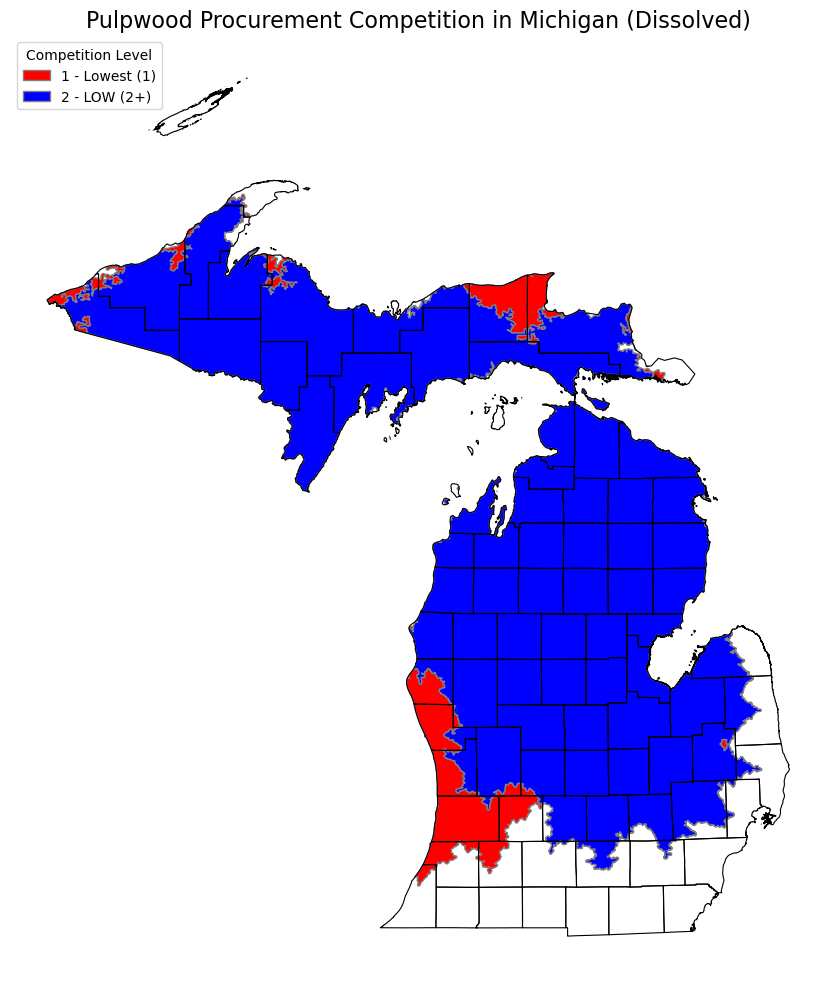

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"

lowest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_lowest.shp"
low_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_low.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest = gpd.read_file(lowest_fp)
gdf_low = gpd.read_file(low_fp)

# --- Reproject to match base CRS ---
common_crs = gdf_michigan.crs
gdf_lowest = gdf_lowest.to_crs(common_crs)
gdf_low = gdf_low.to_crs(common_crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
gdf_lowest.plot(ax=ax, color='#FF0000', edgecolor='grey')  # Red
gdf_low.plot(ax=ax, color='#0000FF', edgecolor='grey')     # Blue

# Create legend
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - LOW (2+)')
]

# Add legend
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# Final layout
plt.title("Pulpwood Procurement Competition in Michigan (Dissolved)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


# rFIA Map

In [71]:
import geopandas as gpd
import pandas as pd
import os

# File paths for pulpwood shapefiles
lowest_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_lowest.shp"
low_fp    = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\competition_levels_dissolved\pulpwood_competition_low.shp"

# Output path
output_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_competition_all_levels.shp"

# Load shapefiles
gdf_lowest = gpd.read_file(lowest_fp)
gdf_low    = gpd.read_file(low_fp)

# Assign levels
gdf_lowest["level"] = 1
gdf_low["level"]    = 2

# Combine both levels
combined_gdf = gpd.GeoDataFrame(
    pd.concat([gdf_lowest, gdf_low], ignore_index=True),
    crs=gdf_lowest.crs
)

# Ensure output directory exists
os.makedirs(os.path.dirname(output_fp), exist_ok=True)

# Save to shapefile
combined_gdf.to_file(output_fp)

print(f"✅ Combined pulpwood shapefile saved at: {output_fp}")


✅ Combined pulpwood shapefile saved at: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\Pulp\pulpwood_competition_all_levels.shp


# The End